<a href="https://colab.research.google.com/github/stephenebert/Springboard/blob/main/Mini_Project_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [NYC Taxi Data Analysis](https://github.com/springboard-curriculum/mec2-projects/blob/main/Student_MLE_MiniProject_EDA.ipynb)

Import relevant packages



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Part 1**

**1. Load the yellow_tripdata_2022-01.parquet file into Pandas**

In [3]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet')

**2. Print the first 5 rows of data**

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


**3. How many rows are in the dataset? How many unique columns are in the dataset?**

In [4]:
df.shape

(2463931, 19)

There are **2463931 rows** and **19 columns**. Here we used the .shape to get this attribute (rows, columns), but there could be duplicates

We see it doesn't matter for this example, but, to be extra safe, we will use the .unique() method to arrive at the same answer

In [5]:
len(df.columns.unique()) #First we extract the columns, use the .unique() method to filter duplicates, then print the number of unique columns

19

In [6]:
len(df) #rows

2463931

**4. Which columns have NULL values and how many NULL values are present in each of these columns?**

In [7]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,71503
trip_distance,0
RatecodeID,71503
store_and_fwd_flag,71503
PULocationID,0
DOLocationID,0
payment_type,0


There are five columns that have null values are "**passenger_count**", "**RatecodeID**", "**store_and_fwd_flag**", "**congestion_surcharge**", and "**airport_fee**". There are **71503** null values present for each of these five columns.

The other fourteen columns have no null values as you can see

**5. Generate summary statistics using Pandas' describe method. Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.**

In [8]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


Yeah, there’s something odd in the dataset. For example, the columns for "fare_amount", "mta_tax", "tip_amount", "tolls_amount", and "airport_fee" contain negative values which is unexpected. These are all charges that should be positive or zero, not negative. It could be a typo, a system bug, or maybe a refund that wasn’t recorded properly. A good next step might be to either leave those rows out of the analysis or, if possible, try to get a cleaner version of the data.

**6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.**

In [9]:
df_filter = df.dropna()

In [10]:
#We can see this works by either looking at the data directly or the shape reduction
print(df_filter.head())
print(f'{df.shape} -drop nulls-> {df_filter.shape}')

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**Part 2**

**1. Create a new feature that calculates the trip duration in minutes.**

Since we are dealing with time, it is convenient to use the datetime data structure so we can just take the difference between times.

Also, according to the problem statement, it says to ignore all null values so we will just use the df_filter DataFrame

In [11]:
df_filter['tpep_pickup_datetime'] = pd.to_datetime(df_filter['tpep_pickup_datetime'])
df_filter['tpep_dropoff_datetime'] = pd.to_datetime(df_filter['tpep_dropoff_datetime'])

<ipython-input-11-452650ce8557>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['tpep_pickup_datetime'] = pd.to_datetime(df_filter['tpep_pickup_datetime'])
<ipython-input-11-452650ce8557>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['tpep_dropoff_datetime'] = pd.to_datetime(df_filter['tpep_dropoff_datetime'])


Now we define a new column called "trip_duration_in_minutes"

In [13]:
df_filter['trip_duration_in_minutes'] = (df_filter['tpep_dropoff_datetime'] - df_filter['tpep_pickup_datetime']).dt.total_seconds()/60

<ipython-input-13-b63137a2c37f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['trip_duration_in_minutes'] = (df_filter['tpep_dropoff_datetime'] - df_filter['tpep_pickup_datetime']).dt.total_seconds()/60


In [120]:
df_filter[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_in_minutes']] #nice to see this indeed works :)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration_in_minutes
0,2022-01-01 00:35:40,2022-01-01 00:53:29,17.816667
1,2022-01-01 00:33:43,2022-01-01 00:42:07,8.400000
2,2022-01-01 00:53:21,2022-01-01 01:02:19,8.966667
3,2022-01-01 00:25:21,2022-01-01 00:35:23,10.033333
4,2022-01-01 00:36:48,2022-01-01 01:14:20,37.533333
...,...,...,...
2392423,2022-01-31 23:24:28,2022-01-31 23:32:47,8.316667
2392424,2022-01-31 23:17:44,2022-01-31 23:22:05,4.350000
2392425,2022-01-31 23:26:41,2022-01-31 23:34:54,8.216667
2392426,2022-01-31 23:37:41,2022-01-31 23:45:26,7.750000


**2. Create additional features for the pick-up day of week and pick-up hour.**

In [27]:
df_filter['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df_filter['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df_filter[['tpep_pickup_datetime', 'pickup_dayofweek', 'pickup_hour']]

<ipython-input-27-413da22f50bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
<ipython-input-27-413da22f50bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


,tpep_pickup_datetime,pickup_dayofweek,pickup_hour
0,2022-01-01 00:35:40,5,0
1,2022-01-01 00:33:43,5,0
2,2022-01-01 00:53:21,5,0
3,2022-01-01 00:25:21,5,0
4,2022-01-01 00:36:48,5,0
...,...,...,...
2392423,2022-01-31 23:24:28,0,23
2392424,2022-01-31 23:17:44,0,23
2392425,2022-01-31 23:26:41,0,23
2392426,2022-01-31 23:37:41,0,23


**3. Use the Seaborn library to create a line plot depicting the number of trips as a function of the hour of day. What's the busiest time of day?**

In [53]:
df_filter['pickup_hour'].head() #since we want the hours, we should go to the hours column

,pickup_hour
0,0
1,0
2,0
3,0
4,0


In [119]:
print(df_filter['pickup_hour'].value_counts())
print(df_filter['pickup_hour'].value_counts().values)
#.value_counts() method is a series that counts the number of unique times a value appears. Extract their values which will be our y coordinate. The x coordinate is the time i.e. this column's index which we use the .index attribute

pickup_hour
18    172507
17    172256
15    170569
16    164751
14    160138
19    147191
13    144455
12    138788
11    126574
10    117011
20    115050
21    106821
9     106285
22    101478
8      97312
23     77199
7      70223
0      57535
1      40334
6      34149
2      27789
3      18439
5      13608
4      11966
Name: count, dtype: int64
[172507 172256 170569 164751 160138 147191 144455 138788 126574 117011
 115050 106821 106285 101478  97312  77199  70223  57535  40334  34149
  27789  18439  13608  11966]


In [87]:
df_filter['pickup_hour'].value_counts().index #0-23 as expected

Index([18, 17, 15, 16, 14, 19, 13, 12, 11, 10, 20, 21,  9, 22,  8, 23,  7,  0,
        1,  6,  2,  3,  5,  4],
      dtype='int32', name='pickup_hour')

We are ready to plot these two arrays df_filter['pickup_hour'].value_counts().index and df_filter['pickup_hour'].value_counts().values

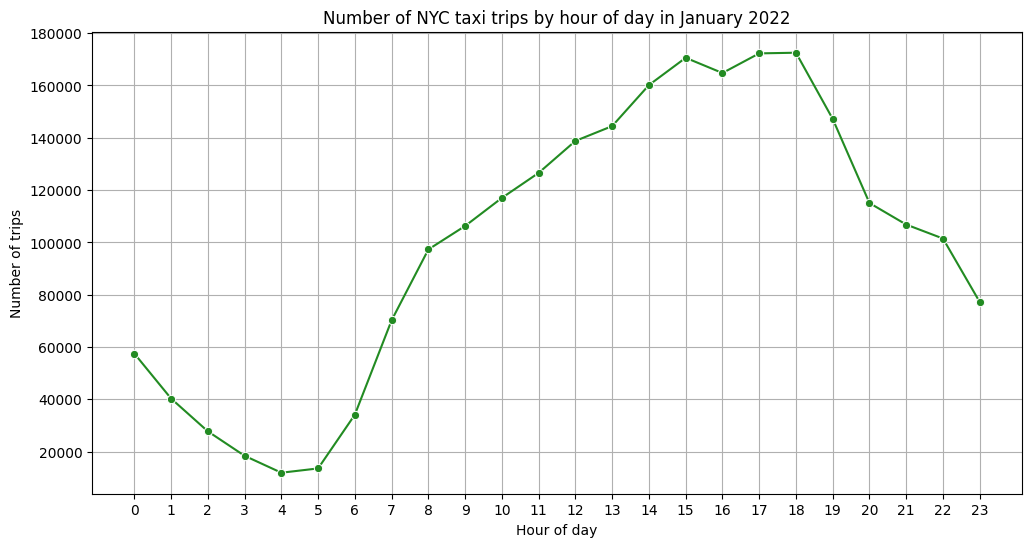

In [81]:
counts_by_hour = df_filter['pickup_hour'].value_counts()
plt.figure(figsize=(12, 6)) #I decided to stretch it out for more room and also looks better
sns.lineplot(x=counts_by_hour.index, y=counts_by_hour.values, marker='o', color = 'forestgreen')
plt.title('Number of NYC taxi trips by hour of day in January 2022')
plt.xlabel('Hour of day')
plt.ylabel('Number of trips')
plt.xticks(range(24)) #since we have data for every hour, it is more visually appealing to have this
plt.grid(True)
plt.show()

From looking at the graph and data, we see that **18:00** or 6:00 pm which makes sense since this is typically dinner time. We can also find the max value's index with the .idxmax() method

In [86]:
print(f"Busiest hour of the day is: {counts_by_hour.idxmax()}:00 which has this number of trips: {counts_by_hour.max()}")

Busiest hour of the day is: 18:00 which has this number of trips: 172507


**4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?**

In [93]:
print(df_filter['pickup_dayofweek'].value_counts().values)
print(df_filter['pickup_dayofweek'].value_counts().index)

[363818 352417 350891 346565 331893 330436 316408]
Index([0, 5, 4, 3, 6, 2, 1], dtype='int32', name='pickup_dayofweek')


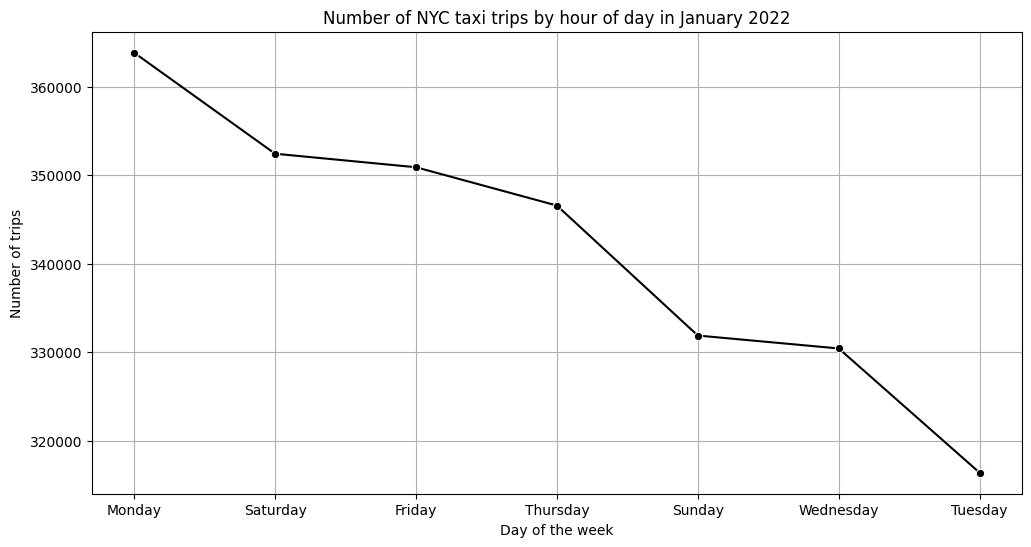

Least busy day of the week is: Tuesday which has this number of trips: 316408


In [149]:
counts_by_week = df_filter['pickup_dayofweek'].value_counts()
plt.figure(figsize=(12, 6))
sns.lineplot(x=counts_by_week.index, y=counts_by_week.values, marker='o', color = 'black')
plt.title('Number of NYC taxi trips by hour of day in January 2022')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()
print(f"Least busy day of the week is: {counts_by_week.idxmin()} which has this number of trips: {counts_by_week.min()}")

We can clearly see the answer is **Tuesday** to be the least busiest day of the week. However, it would be nicer to reorganize the graph in the order ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] <-> [0, 1, 2, 3, 4, 5, 6] as that is more natural. This is where the .reindex() method comes in handy as .value_counts() sorts by frequency in descending order, which can jumble the order of days as we see here

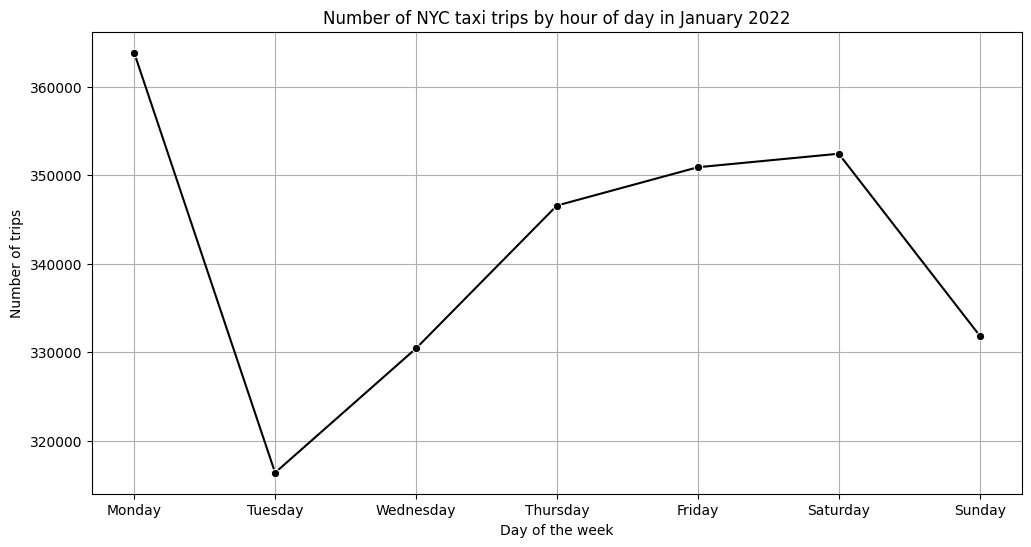

Least busy day of the week is: Tuesday which has this number of trips: 316408


In [148]:
counts_by_week = df_filter['pickup_dayofweek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
sns.lineplot(x=counts_by_week.index, y=counts_by_week.values, marker='o', color = 'black')
plt.title('Number of NYC taxi trips by hour of day in January 2022')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()
print(f"Least busy day of the week is: {counts_by_week.idxmin()} which has this number of trips: {counts_by_week.min()}")

**Part 3**

**1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?**

In [142]:
correlation = df_filter[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_in_minutes']].corr()
print(correlation)
#correlation matrix corr(x, y) = cov(x, y)/ (\sigma_x * \sigma_y) = ( E(x*y)- E(x)*E(y) ) / (\sigma_x * \sigma_y)
#.corr() goes through all possible combinations

                          trip_distance  fare_amount  tip_amount  \
trip_distance                  1.000000     0.039426    0.491978   
fare_amount                    0.039426     1.000000    0.024196   
tip_amount                     0.491978     0.024196    1.000000   
total_amount                   0.048724     0.999878    0.038133   
trip_duration_in_minutes       0.165854     0.008134    0.086206   

                          total_amount  trip_duration_in_minutes  
trip_distance                 0.048724                  0.165854  
fare_amount                   0.999878                  0.008134  
tip_amount                    0.038133                  0.086206  
total_amount                  1.000000                  0.009720  
trip_duration_in_minutes      0.009720                  1.000000  


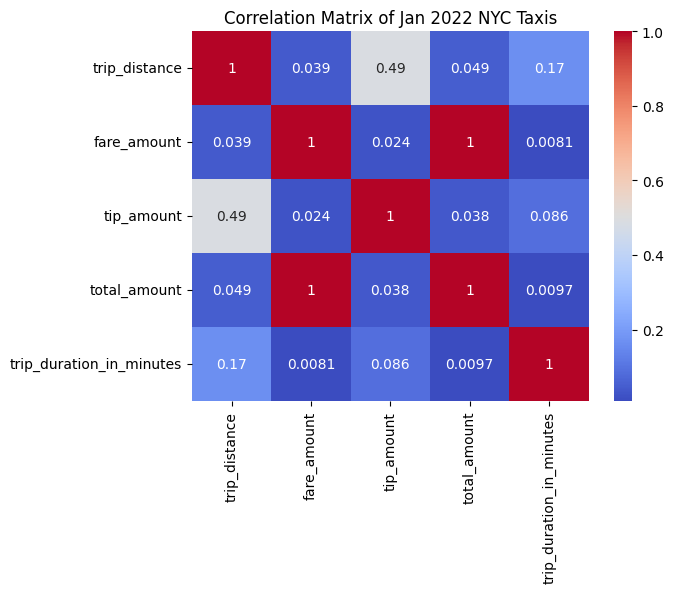

In [147]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Jan 2022 NYC Taxis')
plt.show()

As seen from the heat map, or in the previous cell by just looking the correlation matrix directly with just .corr(), we see that the strongest correlation is **'fare_amount'** and **'total_amount'** by the bright red. A correlation of 1 indicates a *perfect*, positive linear relationship between two variables. Second largest that are not self-correlated goes to 'tip_amount' and 'trip_distance' with correlation of 0.49

**Part 4**

**1. Create a pairplot matrix using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the sample method in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?**

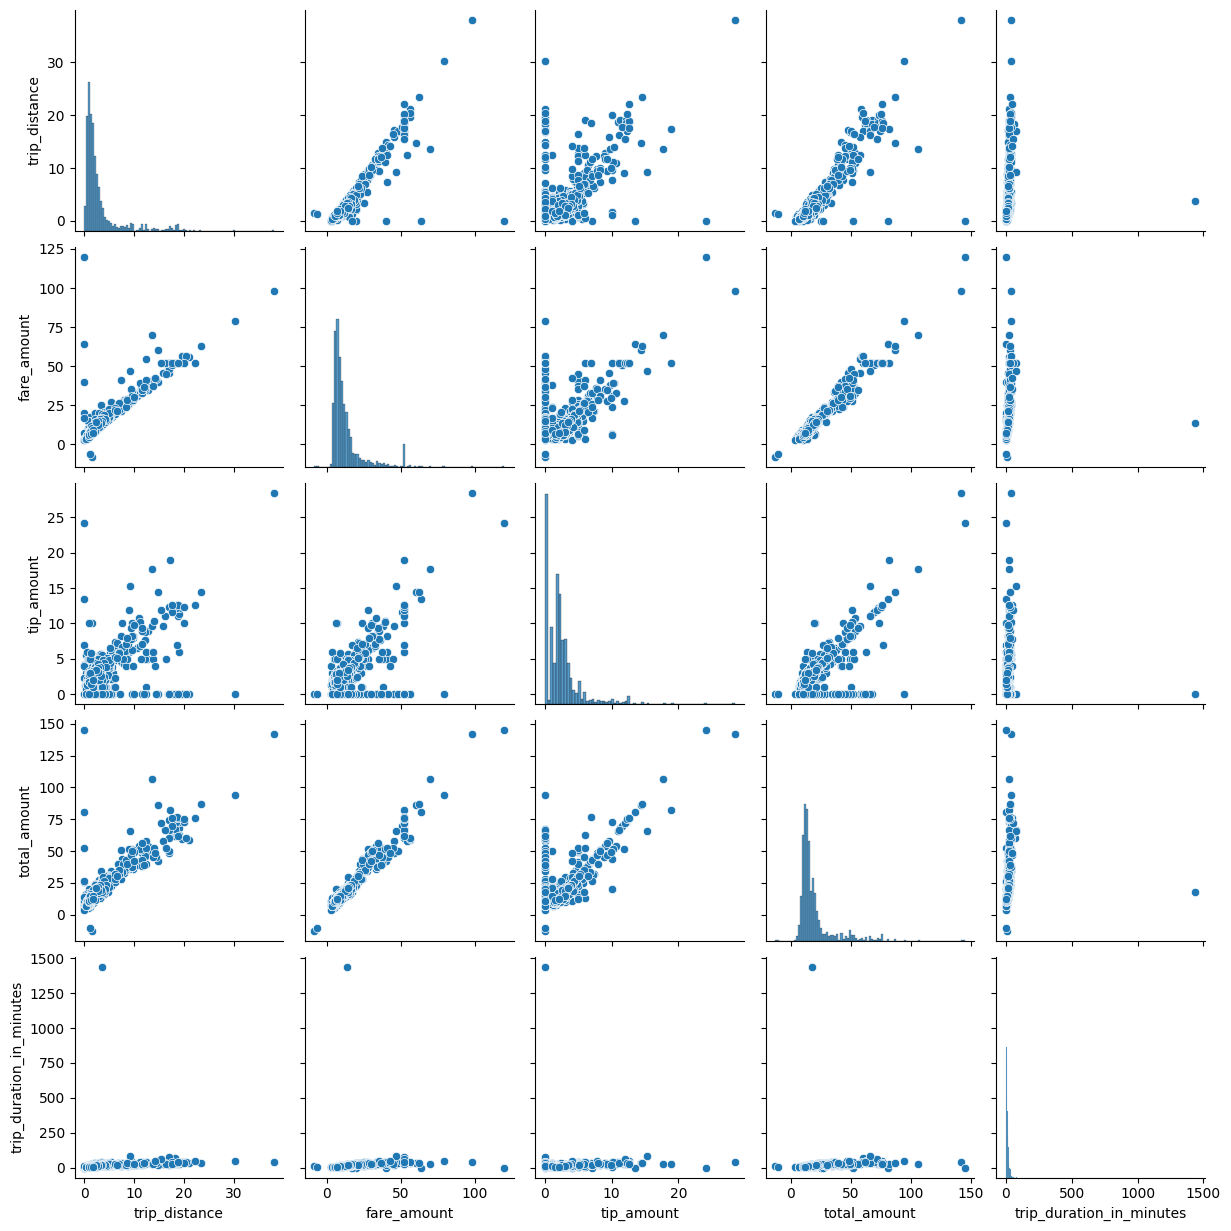

In [152]:
sns.pairplot(df_filter[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_in_minutes']].sample(1000))
plt.show()

**'trip_distance' vs. 'fare_amount'** and **'total_amount' vs. 'fare_amount'** are examples with **strong **relationships or strong correlations. These relationships makes sense since the   longer trips cost more, and take more time.

No relationships or **no** correlations are, for example, **'trip_duration_in_minutes' vs. 'tip_amount'** or **'trip_distance' vs. 'fare_amount'** or **'fare_amount' vs. 'tip_amount'**


In [154]:
cols = ['trip_distance','fare_amount','tip_amount','total_amount', 'trip_duration_in_minutes']
df_filter[cols].corr()


,trip_distance,fare_amount,tip_amount,total_amount,trip_duration_in_minutes
trip_distance,1.000000,0.039426,0.491978,0.048724,0.165854
fare_amount,0.039426,1.000000,0.024196,0.999878,0.008134
tip_amount,0.491978,0.024196,1.000000,0.038133,0.086206
total_amount,0.048724,0.999878,0.038133,1.000000,0.009720
trip_duration_in_minutes,0.165854,0.008134,0.086206,0.009720,1.000000


**Part 5**

**1. Use Seaborn to create a countplot for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?**